# Storytelling Data Visualization Lab

In this lab you'll use a dataset called `housing_prices.csv` which contains the sales data of houses. The dataset and descriptions of the columns are available from [Kaggle](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data). For your convenience, you can review the descriptions of the data columns from [here](https://drive.google.com/file/d/1-iXooLjNuEXU41dqz8ORQ5JEZPHd9x0X/view?usp=sharing).

Pretend you are a data analyst at an investment company where the board decided to make investments in real estates. Your boss asked you to analyze this housing sales dataset and present to the investment managers on **what features of houses are strong indicators of the final sale price**. You need to present your findings in intuitive ways so that the investment managers understand where your conclusions come from.

#### You will use the appropriate data visualization graphs to tell your stories.

## Challenge 1 - Understanding the Dataset

After receiving the data and clarifying your objectives with your boss, you will first try to understand the dataset. This allows you to decide how you will start your research in the next step.

The dataset is [here](https://drive.google.com/file/d/1MRhRtdX8QuPPEhelBIS_FEl5vJjRLSeE/view?usp=sharing). Please download it and place it in the data folder.<br>
First, import the basic libraries and the dataset.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv('../data/housing_prices.csv')
df_backup=df.copy()

#### As a routine before analyzing a dataset, print the first few rows of the dataset

In [2]:
df.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


You find the dataset has 81 columns which are a lot. 

#### Since the column `Id` is meaningless in our data visualization work, let's drop it

In [3]:
# your code here
df = df.drop("Id",axis=1)
df.head(3)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


You care about missing values. If a column has too many missing values, it is not reliable to use it to predict sales price.

#### In the cell below, calculate the percentage of missing values for each column. 

Make a table containing the column name and the percentage of missing values. Print the columns where more than 20% of values are missing. An example of what your output  should look like is [here](https://drive.google.com/file/d/1cuq6qhFZC5wavm-_STcxktBKdAc4xvH8/view?usp=sharing)

[This reference](https://stackoverflow.com/questions/51070985/find-out-the-percentage-of-missing-values-in-each-column-in-the-given-dataset) can help you make the missing values table.

In [4]:
# your code here
missing_perc = pd.DataFrame(columns=["column_name","missing_percentage"])
missing_perc["missing_percentage"] = ((df.isnull().sum()/len(df))*100)
missing_perc["column_name"] = missing_perc.index
missing_perc.sort_values(by="missing_percentage",ascending=False,inplace=True)
missing_perc.head(6)

,column_name,missing_percentage
PoolQC,PoolQC,99.520548
MiscFeature,MiscFeature,96.301370
Alley,Alley,93.767123
Fence,Fence,80.753425
FireplaceQu,FireplaceQu,47.260274
LotFrontage,LotFrontage,17.739726


#### Drop the columns you find that have more than 20% missing values.

After dropping, check the shape of your dataframes. You should have 75 columns now.

In [5]:
# your code here
'''
I converted conditional output to list and then dropped those columns directly from df.
'''
df.drop(list(missing_perc[missing_perc["missing_percentage"] > 20].loc[:,"column_name"]),
        axis=1,inplace=True)
df.shape

(1460, 75)

Since you're asked to analyze sale prices, first let's see if the sale prices (column `SalePrice`) has a normal distribution. This is important because normally distributed data can be better represented with mathematical models.

#### In the cell below, use the propriate graph to visualize the shape of distribution of the sale prices. Then explain what you find from the graph about data distribution.

Text(0.5, 1.0, 'Sales Price Histogram')

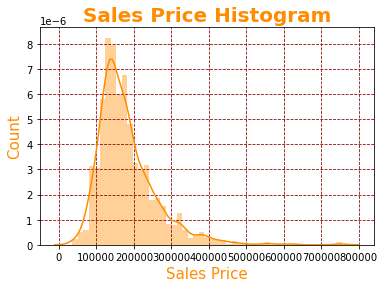

In [6]:
# your code here
'''
by using seaborn distribution plot;
'''
from scipy.stats import norm
sns.distplot(df["SalePrice"],color="darkorange")
plt.grid(True,color="darkred",linestyle="--")
plt.xlabel("Sales Price",size=15,color="darkorange")
plt.ylabel("Count",size=15,color="darkorange")
plt.title("Sales Price Histogram",size=20,fontweight="bold",color="darkorange")

Text(0.5, 1.0, 'Sales Price Histogram')

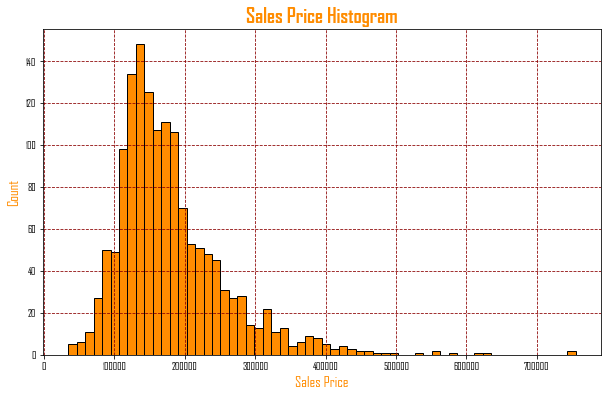

In [7]:
'''
by using matplotlib histogram plot;
'''
plt.rcParams["figure.figsize"]=(10,6)
plt.rcParams["font.family"] = "agency fb"
plt.hist(df["SalePrice"],color="darkorange",lw=1,edgecolor="k",bins=60)
plt.grid(True,color="darkred",linestyle="--")
plt.xlabel("Sales Price",size=15,color="darkorange")
plt.ylabel("Count",size=15,color="darkorange")
plt.title("Sales Price Histogram",size=20,fontweight="bold",color="darkorange")

In [8]:
df[["SalePrice"]].describe()
'''
Mean: 180921.195890
Median: 163000.000000
'''
# your comment here
'''
There is a bit positive skewness. It can be caused by outliers or extreme values on the right side
of the graph.
'''

'\nThere is a bit positive skewness. It can be caused by outliers or extreme values on the right side\nof the graph.\n'

In [9]:
df_skew = df[df["SalePrice"]<500000]
df_skew
df_skew["SalePrice"].skew()

1.2080022811555442

In [10]:
'''
If the skewness is between -0.5 and 0.5, the data are fairly symmetrical.

If the skewness is between -1 and -0.5(negatively skewed) or between 0.5 
and 1(positively skewed), the data are moderately skewed.

If the skewness is less than -1(negatively skewed) or greater than 1(positively skewed), 
the data are highly skewed.


Based on above information if skewness is greater than -1 or +1, then it means data is highly
skewed.

In our ex, skewness is 1.8 which means it is highly skewed.
'''

df["SalePrice"].skew()

1.8828757597682129

## Bonus Challenge 1 - Adjust Data Distribution

If you used the correct method in the previous step, you should have found the data distribution is skewed to the left. In order to improve your data visualization in the next steps, you can opt to adjust the `SalePrice` column by applying a mathematical function to the values. The goal is to produce a bell-shape normal distribution after applying the mathematical function to the sale price.

*This technique is optional in data visualization but you'll find it useful in your future machine learning analysis.*

#### In the cell below, adjust the `SalePrice` column so that the data are normally distributed.

Try applying various mathematical functions such as square root, power, and log to the `SalePrice` column. Visualize the distribution of the adjusted data until you find a function that makes the data normally distributed. **Create a new column called `SalePriceAdjusted` to store the adjusted sale price.**

In [11]:
# your code here
log_saleprice = np.log(df["SalePrice"])
sqrt_saleprice = np.sqrt(df["SalePrice"])
df_adjusted = pd.DataFrame(columns=["SalePrice","LogSalePrice","SqrtSalePrice"])
df_adjusted["SalePrice"] = df["SalePrice"]
df_adjusted["LogSalePrice"] = log_saleprice
df_adjusted["SqrtSalePrice"] = sqrt_saleprice
print("Skewness of normal sale price is : " , df["SalePrice"].skew())
print("Skewness of square root sale price is: " , df_adjusted["SqrtSalePrice"].skew())
print("Skewness of logarithmic sale price is: " , df_adjusted["LogSalePrice"].skew())

'''
We can see that for this data the best option to choose is applying logarithmic operation
to sale price to make data more normally distributed.
'''

Skewness of normal sale price is :  1.8828757597682129
Skewness of square root sale price is:  0.9431527373310963
Skewness of logarithmic sale price is:  0.12133506220520406


'\nWe can see that for this data the best option to choose is applying logarithmic operation\nto sale price to make data more normally distributed.\n'

'\nAs expected from above results, it is almost perfectly normally distributed now.\n'

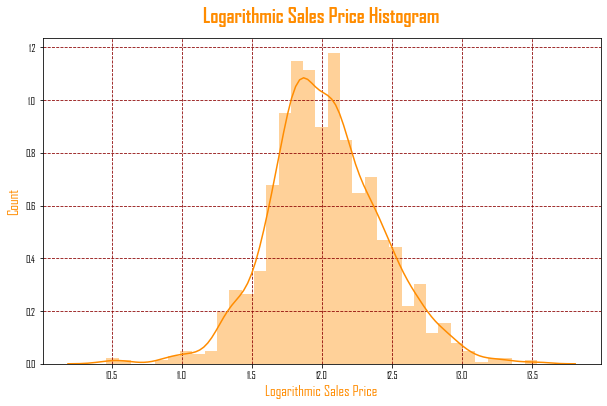

In [12]:
sns.distplot(df_adjusted["LogSalePrice"],color="darkorange")
plt.grid(True,color="darkred",linestyle="--")
plt.xlabel("Logarithmic Sales Price",size=15,color="darkorange")
plt.ylabel("Count",size=15,color="darkorange")
plt.title("Logarithmic Sales Price Histogram",size=20,fontweight="bold",color="darkorange",pad=15)

'''
As expected from above results, it is almost perfectly normally distributed now.
'''

## Challenge 2 - Exploring Data with Common Sense

Now that we have a general understanding of the dataset, we start exploring the data with common sense by means of data visualization. Yes, in data analysis and even machine learning you are often required to use common sense. You use your common sense to make a scientific guess (i.e. hypothesis) then use data analytics methods to test your hypothesis.

This dataset is about housing sales. According to common sense, housing prices depend on the following factors:

* **Size of the house** (`GrLivArea`, `LotArea`, and `GarageArea`).

* **Number of rooms** (`BedroomAbvGr`, `KitchenAbvGr`, `FullBath`, `HalfBath`, `BsmtFullBath`, `BsmtHalfBath`).

* **How long the house has been built or remodeled** (`YearBuilt` and `YearRemodAdd`).

* **Neighborhood of the house** (`Neighborhood`).

#### In this challenge, use the appropriate graph type to visualize the relationships between `SalePrice` (or `SalePriceAdjusted`) and the fields above. 

Note that:

* Transform certain columns in order to visualize the data properly based on common sense. For example:
    * Visualizing how the number of half bathrooms affected the sale price probably does not make sense. You can create a new column to calculate the total number of bathrooms/rooms then visualize with the calculated number.
    * `YearBuilt` and `YearRemodAdd` are year numbers not the age of the house. You can create two new columns for how long the house has been built or remodeled then visualize with the calculated columns.
* Make comments to explain your thinking process.

In [13]:
'''
Creating a new colum based on total number of rooms in the house
'''

df["LogSalePrice"] = log_saleprice

df["no_rooms"] = (df["BedroomAbvGr"] + df["KitchenAbvGr"] + df["FullBath"] + df["HalfBath"] + 
                  df["BsmtFullBath"] + df["BsmtHalfBath"])

Correlation between LogSalePrice and Number of rooms is:  0.5211204930045001


"\nBased on below graph, it is also possible to guess price range for typical number of houses;\nfor instance: 8 rooms houses' price range is between 11.5 and 12.5 log SalePrice range. - which is \naround 97.000 E and 268.00 E.\n"

<Figure size 720x432 with 0 Axes>

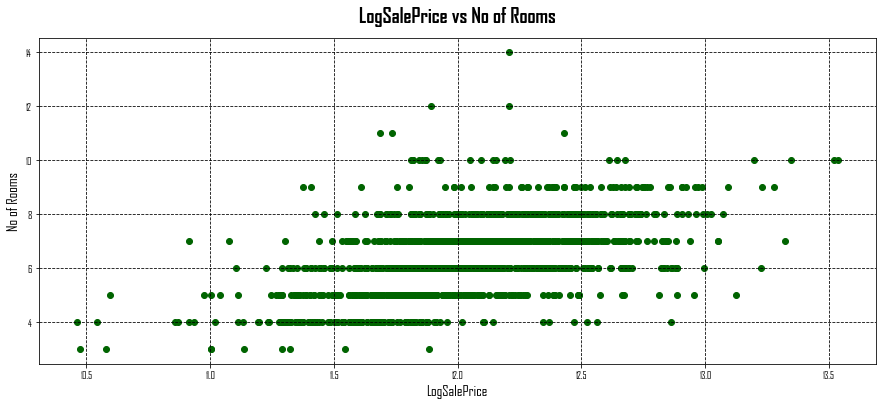

In [14]:
'''
1) Checking relation between Sale Prices and Number of rooms
'''

plt.figure()
fig1 , ax = plt.subplots(figsize=(15,6))
plt.scatter(df["LogSalePrice"],df["no_rooms"],color="darkgreen")
plt.grid(True,color="k",linestyle="--")
plt.title("LogSalePrice vs No of Rooms",size=20,fontweight="bold",color="k",pad=15)
plt.xlabel("LogSalePrice",size=15,c="k")
plt.ylabel("No of Rooms",size=15,c="k")

print("Correlation between LogSalePrice and Number of rooms is: ",
      df["LogSalePrice"].corr(df["no_rooms"]))

'''
Based on below graph, it is also possible to guess price range for typical number of houses;
for instance: 8 rooms houses' price range is between 11.5 and 12.5 log SalePrice range. - which is 
around 97.000 E and 268.00 E.
'''

Correlation between house size and saleprice is:  0.3022199151933874


'\nWell, there is slightly positive relationship between those two variables.\n\nThis could be tricky since if we imagine 30-40% percent of house size is consisting of garage size, \nthen for sure, price would be lower for the houses around same size.\n'

<Figure size 1080x432 with 0 Axes>

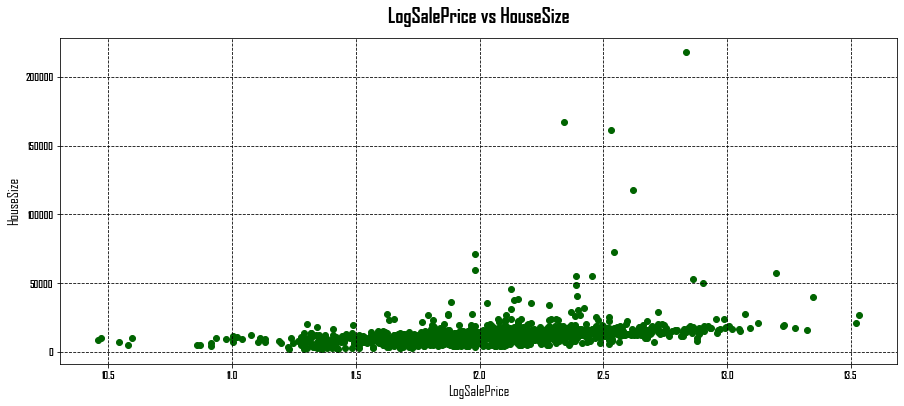

In [15]:
'''
2) Checking relation between Sale Prices and House Size
'''
df["HouseSize"] = df["GrLivArea"] + df["LotArea"] + df["GarageArea"]

plt.figure(figsize=(15,6))
fig2 , ax = plt.subplots(figsize=(15,6))
plt.scatter(df["LogSalePrice"],df["HouseSize"],color="darkgreen")
plt.grid(True,color="k",linestyle="--")
plt.title("LogSalePrice vs HouseSize",
                size=20,fontweight="bold",color="k",pad=15)
plt.xlabel("LogSalePrice",size=15,c="k")
plt.ylabel("HouseSize",size=15,c="k")
plt.xticks(fontweight="bold")
plt.yticks(fontweight="bold")

house_size_corr = df["LogSalePrice"].corr(df["HouseSize"])
print("Correlation between house size and saleprice is: ", house_size_corr)



'''
Well, there is slightly positive relationship between those two variables.

This could be tricky since if we imagine 30-40% percent of house size is consisting of garage size, 
then for sure, price would be lower for the houses around same size.
'''

In [16]:
'''
2-a ) Above plot with hue applied on Garage Status
'''

#df = df_backup.copy()

df["GarageStatus"] = np.zeros(df.shape[0])
ga_index = df.columns.get_loc("GarageStatus")
df.iloc[df[df["GarageArea"] != 0].index,ga_index] = "With Garage"
df.iloc[df[df["GarageArea"] == 0].index,ga_index] = "Without Garage"

#sns.scatterplot(data=df,x="LogSalePrice",y="HouseSize",hue="GarageStatus")

'''
Well that's strange, I have tried to hue Garage Status, it has only 2 outcomes as "With Garage"
and "Without Garage" but above seaborn code does not work. - shown below - already googled it 
but couldn't find any solution to that error.It's working without hue parameter.
'''

a = df[["LogSalePrice","HouseSize","GarageStatus"]].sample(3)

In [17]:
a.dtypes

LogSalePrice    float64
HouseSize         int64
GarageStatus     object
dtype: object

In [18]:
'''
3) Calculating house age by considering renovation status;
    - if renovated, subtraction is done by using closest date
'''

current_year = 2020

df["age"] = np.zeros(df.shape[0])
df["renovation"] = np.zeros(df.shape[0])
renovated = df[df["YearBuilt"] != df["YearRemodAdd"]]
not_renovated = df[df["YearBuilt"] == df["YearRemodAdd"]]

for i in range(0,len(df)):
    if df["YearBuilt"][i] != df["YearRemodAdd"][i]:
        df.loc[i,["age"]] =  current_year - df.loc[i,["YearRemodAdd"][0]]
    elif df["YearBuilt"][i] == df["YearRemodAdd"][i]:
        df.loc[i,["age"]] =  current_year - df.loc[i,["YearBuilt"][0]]

In [19]:
'''
Filling extra column called "renovation" to see whether house is renovated or not,
will be used as a "hue" in the plot
'''
for i in range(0,len(df)):
    if df["YearBuilt"][i] != df["YearRemodAdd"][i]:
        df.loc[i,["renovation"]] =  "Renovated"
    elif df["YearBuilt"][i] == df["YearRemodAdd"][i]:
        df.loc[i,["renovation"]] =  "Not Renovated"

Correlation between house size and saleprice is:  -0.5656078325911796


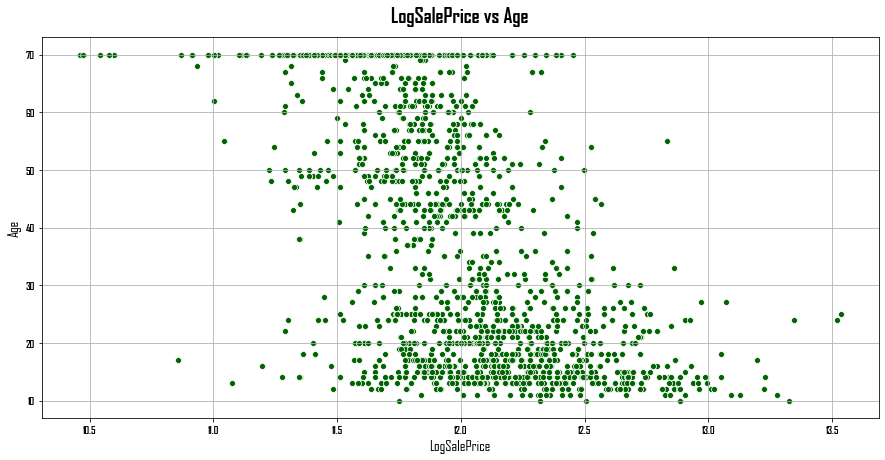

'\nAs it can be seen from the graph and also as a result of correlation function, there is a moderately\nnegative relationship between Age and SalePrice.\n\nAgain, I wanted to add hue parameter (above) to observe also renovated houses in this graph, \nbut did receive the same error - zero sized array..\n'

In [20]:
#plt.figure()
fig3 , ax = plt.subplots(figsize=(15,7))
sns.set_style("whitegrid")
sns.scatterplot(data=df,x="LogSalePrice",y="age",color="darkgreen")#,hue="renovation")
plt.title("LogSalePrice vs Age",
                size=20,fontweight="bold",color="k",pad=15)
plt.xlabel("LogSalePrice",size=15,c="k")
plt.ylabel("Age",size=15,c="k")
plt.xticks(fontweight="bold")
plt.yticks(fontweight="bold")
plt.grid(True)

age_corr = df["LogSalePrice"].corr(df["age"])
print("Correlation between house size and saleprice is: ", age_corr)
plt.show()

'''
As it can be seen from the graph and also as a result of correlation function, there is a moderately
negative relationship between Age and SalePrice.

Again, I wanted to add hue parameter (above) to observe also renovated houses in this graph, 
but did receive the same error - zero sized array..
'''

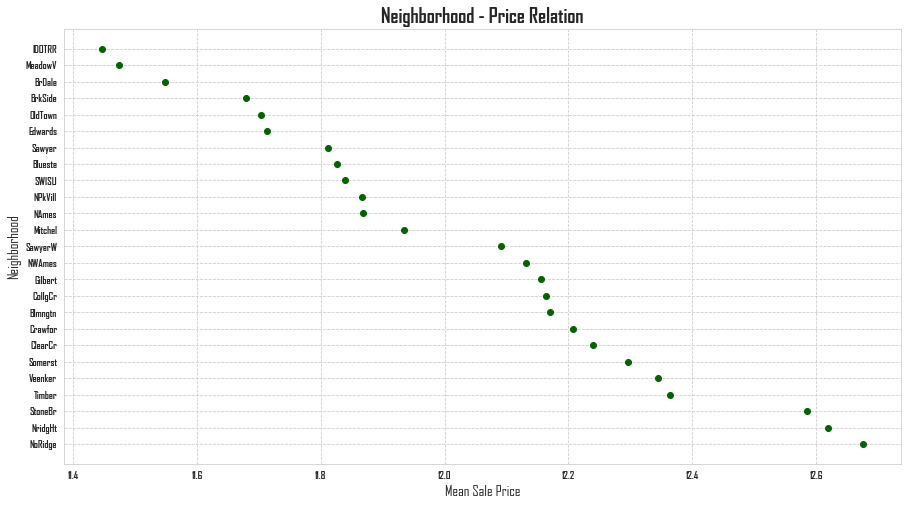

In [21]:
'''
3) Checking neighborhood-price relation
'''

price_nghb = pd.pivot_table(df,values="LogSalePrice",aggfunc="mean",columns="Neighborhood"
              ).T.sort_values(by="LogSalePrice",ascending=False)


plt.rcParams["font.family"]="agency fb"
fig4,ax=plt.subplots(figsize=(15,8))

plt.scatter(x=price_nghb.reset_index()["LogSalePrice"],y=price_nghb.reset_index()["Neighborhood"],
           color="darkgreen")


plt.title("Neighborhood - Price Relation",size=20,fontweight="bold")
plt.grid(True,linestyle="--")
plt.xlabel("Mean Sale Price",size=15)
plt.ylabel("Neighborhood",size=15)
plt.xticks(fontweight="bold")
plt.yticks(fontweight="bold")
plt.show()

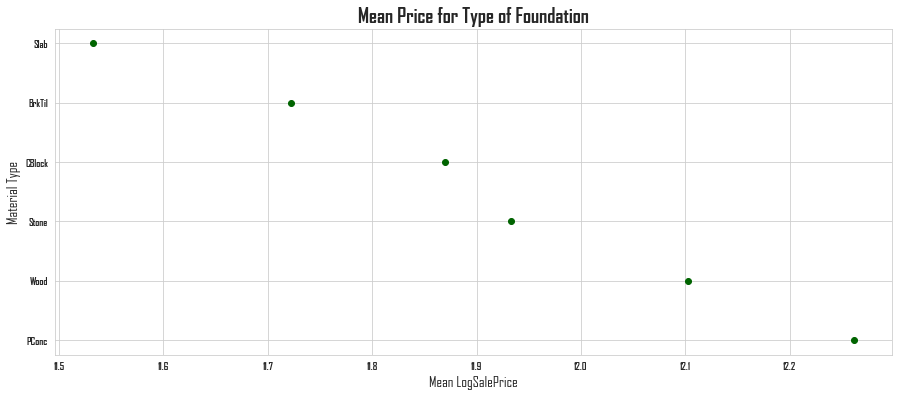

In [22]:
'''
4) Used material type - price [Foundation]
'''
quality = df.groupby("Foundation")[["LogSalePrice"]].mean().sort_values(
    by="LogSalePrice",ascending=False)
quality

plt.rcParams["font.family"]="agency fb"
fig6,ax=plt.subplots(figsize=(15,6))
plt.scatter(quality.reset_index()["LogSalePrice"],quality.reset_index()["Foundation"],
            color="darkgreen")
plt.xlabel("Mean LogSalePrice",size=15)
plt.ylabel("Material Type",size=15)
plt.title("Mean Price for Type of Foundation",size=20,fontweight='bold')
plt.xticks(fontweight="bold")
plt.yticks(fontweight="bold")
plt.grid(True)

## Bonus Challenge 2 - Exploring Data with Correlation Heatmap

Now you have explored data visualizations with certain fields based on common sense. In the dataset there are many other fields that you are not sure whether they are important factors for the sale price. What is the best way to explore those fields without investigating them individually?

Making scatter matrix is not an option here because there are too many fields which makes it extremely time consuming to create scatter matrix. One option you have is to create a heatmap. Heatmaps are much less expensive to create than scatter matrixes. You can use heatmaps to visualize the pairwise correlations between each two variables.

Here is a [reference](https://seaborn.pydata.org/examples/many_pairwise_correlations.html) you can use to learn how to creat the pairwise correlation heatmap. Your heatmap should look like this [example](https://drive.google.com/file/d/1JhdNvbAnnWDFXEtDoBtx3B2KKIkqsnSH/view?usp=sharing)

<AxesSubplot:>

<Figure size 720x432 with 0 Axes>

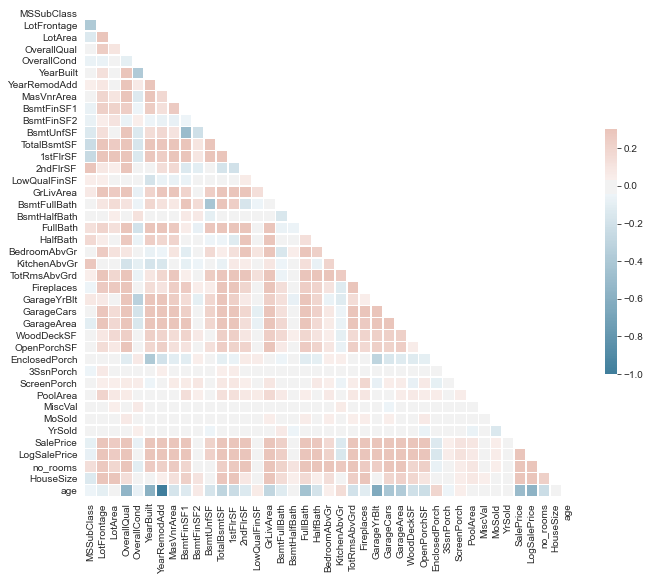

In [23]:
# your code here
fig5 = plt.figure()

sns.set_style("white")
corr = df.corr()
#sns.heatmap(corr)
mask = np.triu(np.ones_like(corr, dtype=bool))

fig5, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)

fig5.add_subplot(sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},annot=False))
#plt.figure(figsize=(12,12))

In your heatmap, you can easily identify the highly correlated (either positively or negatively) variables by looking for the grids with darker colors. 

#### In the cell below, summarize what variables are highly correlated to the sale price?

In [24]:
# your comment here
'''
By checking LogSalePrice row, we can see its relation with other variables in our df.

In this case, highly correlated columns are; LotFronage,LotArea,OverallQualmYearBuilt,
YearRemodAdd, etc.

Below defining function to check all correlations with saleprice, option 2;
'''
def corr_checker(df):
    cor_lst = []
    for column in df._get_numeric_data().columns:
        cor_res = df["LogSalePrice"].corr(df[column])
        cor_lst.append(cor_res)
        
    cor_lst
    zip_tog = list(zip(df._get_numeric_data().columns,cor_lst))
    sortedList= sorted(zip_tog, key=lambda x: (x[1]),reverse=True)
    return sortedList

corr_checker(df)

[('LogSalePrice', 1.0),
 ('SalePrice', 0.9483737306090612),
 ('OverallQual', 0.8171844179216834),
 ('GrLivArea', 0.7009266525441297),
 ('GarageCars', 0.6806248074360473),
 ('GarageArea', 0.6508875559020072),
 ('TotalBsmtSF', 0.6121339753697864),
 ('1stFlrSF', 0.596981045034374),
 ('FullBath', 0.5947705420075323),
 ('YearBuilt', 0.5865702403842267),
 ('YearRemodAdd', 0.5656078325911796),
 ('GarageYrBlt', 0.5410728625958761),
 ('TotRmsAbvGrd', 0.5344222037231254),
 ('no_rooms', 0.5211204930045001),
 ('Fireplaces', 0.48944942759848564),
 ('MasVnrArea', 0.43080852419510995),
 ('BsmtFinSF1', 0.3720230735670881),
 ('LotFrontage', 0.3558784703859829),
 ('WoodDeckSF', 0.33413507395751235),
 ('OpenPorchSF', 0.3210529720197674),
 ('2ndFlrSF', 0.3192999843472047),
 ('HalfBath', 0.31398224991514845),
 ('HouseSize', 0.3022199151933874),
 ('LotArea', 0.2573198923527387),
 ('BsmtFullBath', 0.23622410882435002),
 ('BsmtUnfSF', 0.22198505352520978),
 ('BedroomAbvGr', 0.20904368212692034),
 ('ScreenPorc

## Challenge 3 - Present Your Stories

Now based on your findings from the explorations, summarize and present your stories.

#### Present the top 5 factors that affect the sale price.

Use the following format to present each factor:

1. A title line about the factor.

1. No more than 3 sentences to describe the relationship between the factor and the sale price.

1. Support your point with the appropriate graph.

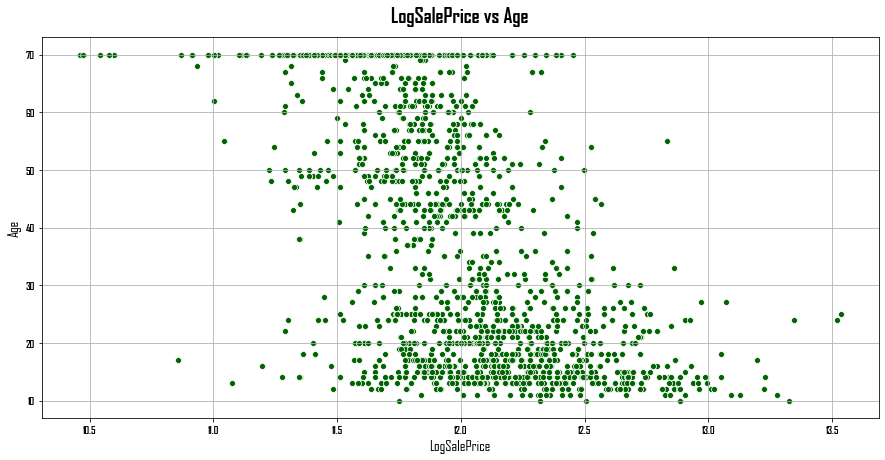

In [25]:
'''
Factor 1 - Age
Correlation result: -0.56
Negative correlation between SalePrice and age of house.

In order to calculate age, I took the difference between current year and built year. But since
some houses are renovated after built year, this calculation was made by using latest 
date either by built year or renovation year.


The higher the house age, the lower the sale price.
'''
fig3

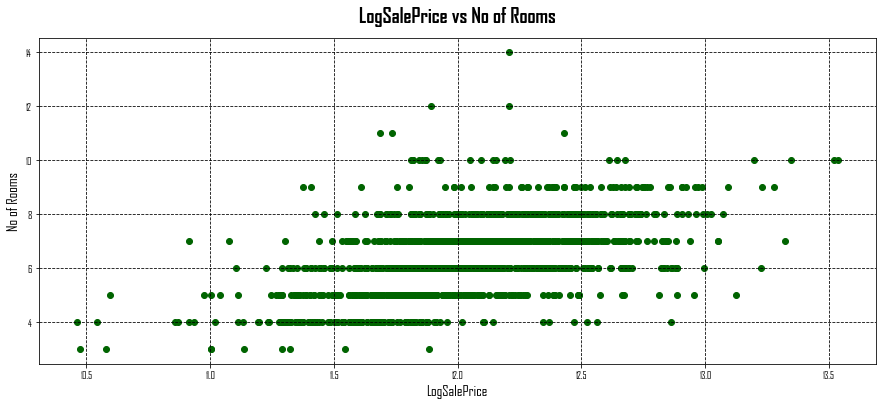

In [26]:
'''
Factor 2 - Number of rooms
Correlation result: + 0.521
Positive correlation between Number of rooms and HouseSize.

Total number of rooms are consisting of;
    a) BedroomAbvGr 
    b) KitchenAbvGr
    c) FullBath
    d) HalfBath
    e) BsmtFullBath
    f) BsmtHalfBath

They all have their own correlation with HousePrice but doesn't mean lot once considered individually.
Therefore, we sum all rooms up in order to find total number of rooms in the house.
                  
The higher the number of the rooms, the higher the sales price. 
'''
fig1

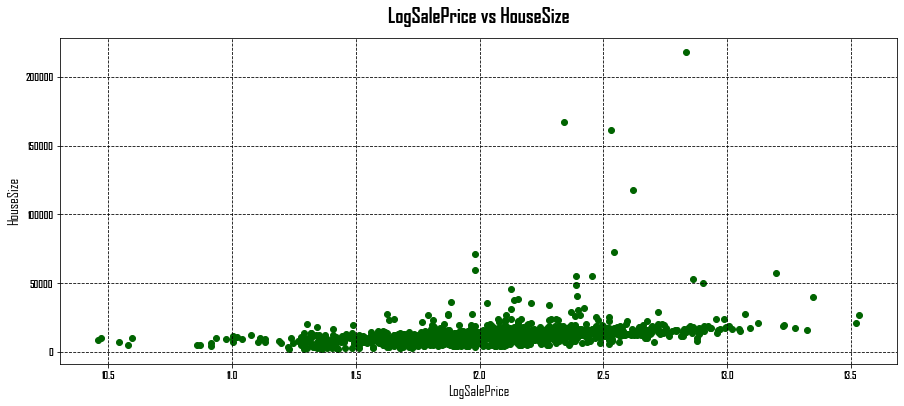

In [27]:
'''
Factor 3 - Living Area
Correlation result: + 0.302 
Positive correlation between SalePrice and HouseSize.


Total living area consists of;
    a) GrLivArea - Above grade (ground) living area square feet
    b) LotArea: Lot size in square feet
    c) GarageArea: Size of garage in square feet
    d) PoolArea: Pool area in square feet (Not included in this analysis)

All have their own correlation results with Sale Price however, summing up those areas provide us
total size of the house.


The higher the house size, the higher the sale price.
'''
fig2

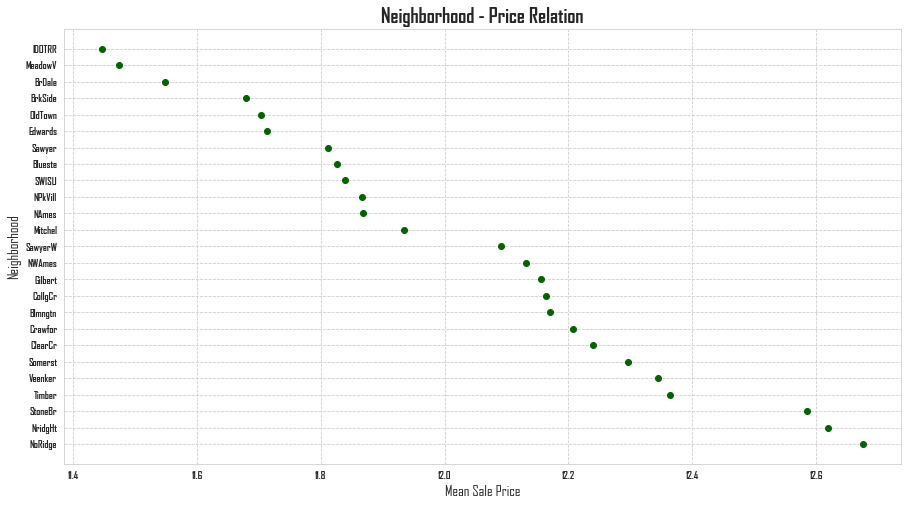

In [28]:
'''
Factor 4 - Neighborhood

It was observed that prices in some neigborhoods are much higher compared to others.

Top 3 most expensive neighborhoods are;
    1) NoRidge
    2) NridHt
    3) StoneBr  
'''

fig4

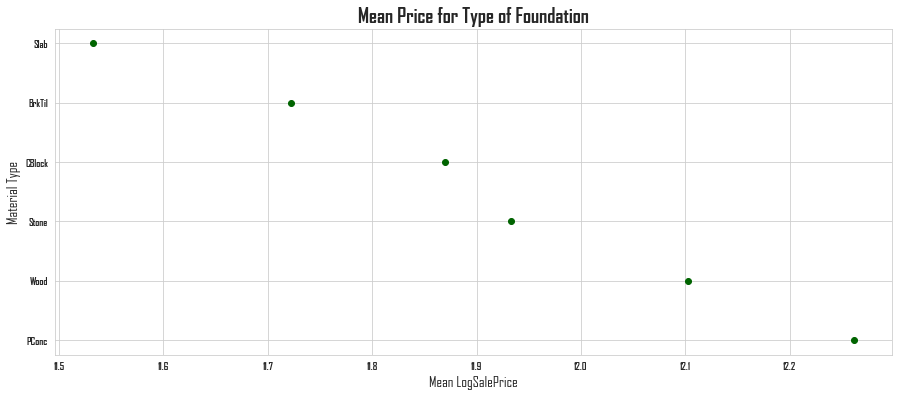

In [29]:
'''
Factor 5 - Foundation

It is also investigated that usage of certain type of materials lead higher sale price.
By order;
    1) PConc material
    2) Wood
    
    If houses include any of above types material, it's more likely that they are going to be more 
    expensive compared to other type houses where other type of materials were used.
'''
fig6
